# Processamento

Assume-se Python 3 no sistema Unix, e a preparação é simples

```bash
sudo pip3 install matplotlib scikit-learn
```

## Scipy

O [Scipy](http://www.scipy.org/) fornece ferramentas eficientes para processamento dos dados (usando o [numpy](https://numpy.org/)) nas aplicações científicas mais comuns.

In [1]:
import numpy as np
from scipy import optimize

np.random.seed(42)

def sine(x, amp, freq):
    return amp * np.sin(freq * x)

num_points = 50
amplitude, frequency = 2.9, 1.5
x = np.linspace(-5, 5, num=num_points)
y = sine(x, amplitude, frequency)
noisy_y = y + np.random.normal(size=x.size)

# Ajuste os parâmetros da função
params, covariance = optimize.curve_fit(sine, x, noisy_y)
fitted_y = sine(x, *params)

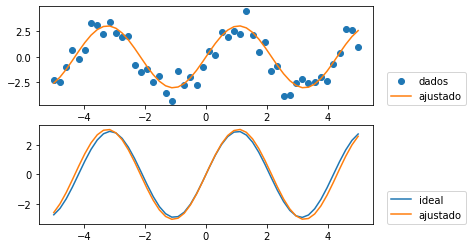

In [2]:
# Visualmente
%matplotlib inline

from matplotlib import pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(x, noisy_y, marker='o', linestyle='', label='dados')
plt.plot(x, fitted_y, label='ajustado')
plt.legend(loc=(1.04,0))

plt.subplot(2, 1, 2)
plt.plot(x, y, label='ideal')
plt.plot(x, fitted_y, label='ajustado')
plt.legend(loc=(1.04,0))

## scikit-learn

O [scikit-learn](https://scikit-learn.org/stable/) é uma das bibliotecas mais utilizadas para aplicações de aprendizagem de máquina. Geralmente, deseja-se reconhecer um padr'ao a partir de dados. Por exemplo, pode-se tentar aplicar [regressão](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html) dos dados para tentar inferir a função `seno`.

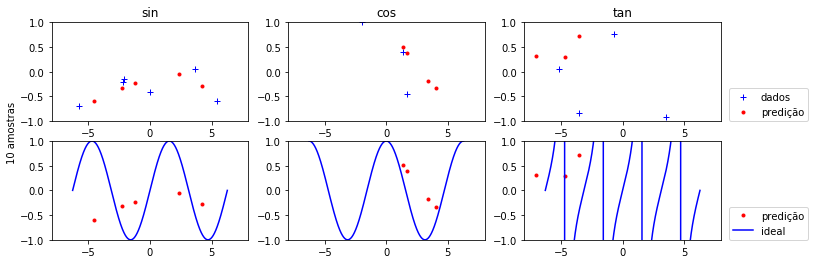

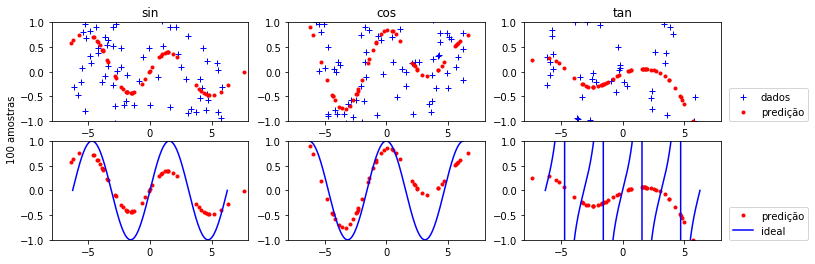

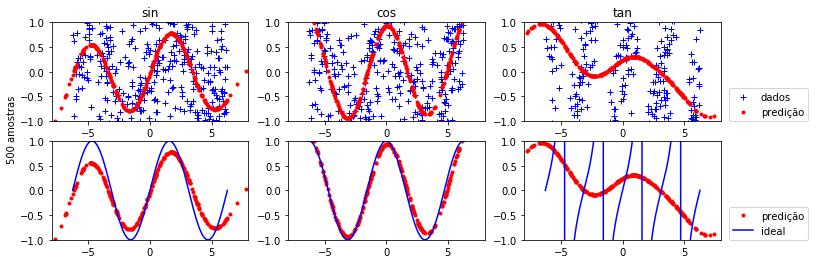

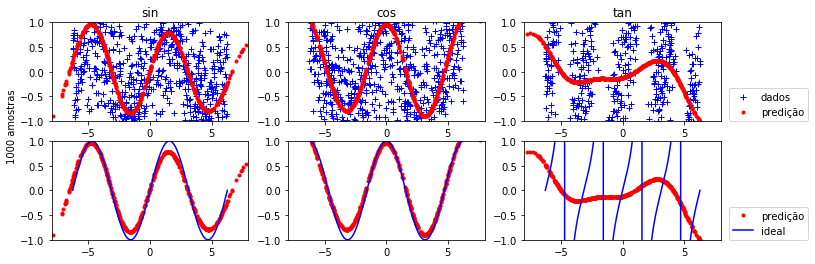

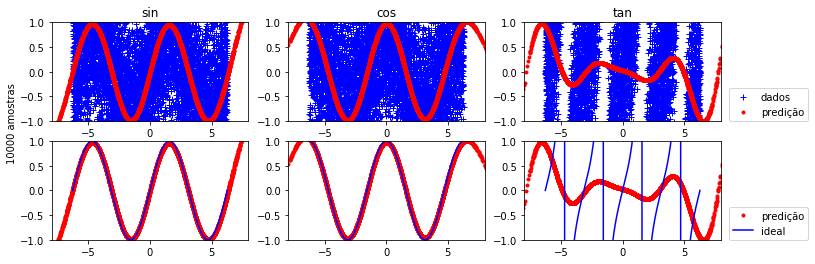

In [3]:
from pandas import DataFrame as DF
from sklearn import svm

functions = [np.sin, np.cos, np.tan]

max_size = 10000
X = np.linspace(-2 * np.pi, 2 * np.pi, num=max_size)
y = [f(X) for f in functions]
        

def generate_data(f, size):
    def noise(size):
        return np.random.normal(size=size)

    # Dados para realizar a regressão
    train_X = np.random.choice(X, size=size, replace=False)
    train_y = f(train_X) + noise(size)

    # Dados para testar a regressão
    test_X = np.random.choice(X, size=(size // 2), replace=False) + noise(size // 2)
    
    return train_X, train_y, test_X
    

def SVR_predict():
    clf = svm.SVR()
    clf.fit(train_X, train_y.values.ravel())
    
    return clf.predict(test_X) 

############################################
ncols = len(functions)
plt_width = 4 # inches
num_samples = [10, 100, 500, 1000, 10000]

i = 0

for samples in num_samples:
    plt.figure(figsize=(ncols * plt_width, plt_width))

    for index in range(ncols):
        train_X, train_y, test_X = (DF(series) for series in generate_data(functions[index], samples))
        prediction = SVR_predict()
        
        # Plot
        data_pred = plt.subplot(2, ncols, index + 1, title=functions[index].__name__)
        plt.xlim(-8, 8)
        plt.ylim(-1, 1)
        plt.plot(train_X, train_y, 'b+', label='dados')
        plt.plot(test_X, prediction, 'r.', label='predição')

        ideal_pred = plt.subplot(2, ncols, index + ncols + 1)
        plt.xlim(-8, 8)
        plt.ylim(-1, 1)
        plt.plot(test_X, prediction, 'r.', label='predição')
        plt.plot(X, y[index], 'b', label='ideal')
    
    data_pred.legend(loc=(1.04,0))
    ideal_pred.legend(loc=(1.04,0))
    ideal_pred.text(-50, .6, f'{samples} amostras', rotation='vertical')

    plt.show()

## Outros Recursos

* [Machine Learning in Python](https://www.springboard.com/resources/learning-paths/machine-learning-python/)